In [82]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import copy

In [83]:
# build model

def createModel():

    ANNnet = nn.Sequential(
        nn.Linear(2,8),  # input layer             
        nn.Linear(8,1),  # hidden layer       
        nn.Linear(1,1)   # output layer
        )
    
    return ANNnet

net = createModel()

net

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [84]:
def setXavierWeights(net, seed):
    
    if seed > 0:
      torch.manual_seed(seed)
      
    for p in net.named_parameters():
      if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)
        

In [85]:
seeds = [('noseed',0), ('rs1a', 2354), ('rs2', 6598), ('rs1b',2354)]
weights = []

net = createModel()

for label, seed in seeds:
    
    netcp = copy.deepcopy(net)

    setXavierWeights(netcp, seed)

    allWeights = torch.cat([param.view(-1) for param in netcp.parameters()]).detach().numpy()
    weights.append((label,allWeights))    


In [86]:
weights[2]

('rs2',
 array([-0.8697303 , -0.43177617,  0.04642671, -0.6067463 ,  0.04889911,
         0.80045736, -0.04154826,  0.67090356, -0.4656343 ,  0.8590389 ,
         0.27900505,  0.19241983, -0.32290432,  0.18831444, -0.18079053,
        -0.18799995,  0.44377667,  0.00259399, -0.4844228 ,  0.44541723,
         0.6479977 , -0.50029874,  0.61776704,  0.39717895, -0.14261675,
        -0.42471036, -0.4523609 ,  0.33989754,  1.1889479 ,  0.412031  ,
         0.8142186 , -0.5868616 ,  0.00901693,  0.6739904 ,  0.17147958],
       dtype=float32))

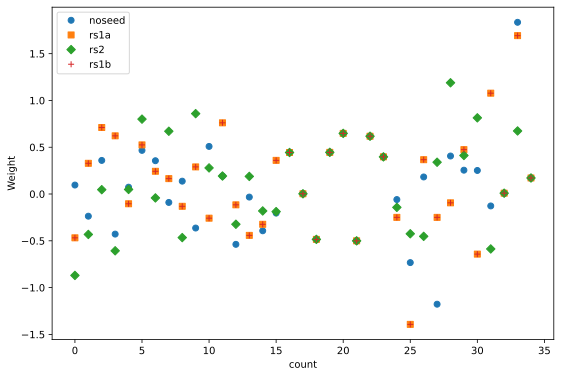

In [87]:
plt.figure(figsize=(9,6))

plt.plot(weights[0][1], 'o', label=f"{weights[0][0]}")
plt.plot(weights[1][1], 's', label=f"{weights[1][0]}")
plt.plot(weights[2][1], 'D', label=f'{weights[2][0]}')
plt.plot(weights[3][1], '+', label=f'{weights[3][0]}')

plt.legend()
plt.xlabel('count')
plt.ylabel('Weight')

plt.show()

In [88]:
rs1a_rs1b = weights[1][1] - weights[3][1]

rs1a_rs1b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [89]:
noseed_rs2 = weights[0][1] - weights[2][1]
noseed_rs2

array([ 9.6569121e-01,  1.9494948e-01,  3.1269246e-01,  1.7857558e-01,
        2.4291497e-02, -3.3402944e-01,  3.9740962e-01, -7.6082134e-01,
        6.0310006e-01, -1.2224579e+00,  2.2967505e-01, -1.1521578e-04,
       -2.1474442e-01, -2.2094251e-01, -2.1205528e-01, -1.5649050e-02,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        8.3547905e-02, -3.0809352e-01,  6.3469523e-01, -1.5172151e+00,
       -7.8270566e-01, -1.5725303e-01, -5.6244266e-01,  4.5957911e-01,
        0.0000000e+00,  1.1611321e+00,  0.0000000e+00], dtype=float32)